In [1]:
# Importe as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregue o conjunto de dados de gorjetas
tips = pd.read_csv('/home/jovyan/data/tips.csv')

# Exibe as primeiras linhas do DataFrame para verificar os dados
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [2]:
# Divida os dados em atributos (X) e variável alvo (y)
X = tips[['total_bill', 'size']]  # Características como total da conta e tamanho da mesa
y = tips['tip']                   # Variável alvo, gorjeta

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

# Crie e ajuste um modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Faça previsões
y_pred = regression_model.predict(X_test)

# Avalie o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error: 0.6485996190543516
R-squared (R2): 0.4811084097989491


In [3]:
# Suponha que você tenha novos dados que deseja usar para fazer previsões
novos_dados = pd.DataFrame({'total_bill': [50.0, 30.0, 25.0], 'size': [4, 2, 1]})

# Use o modelo treinado para fazer previsões com os novos dados
previsoes = regression_model.predict(novos_dados)

# As previsões são armazenadas na variável 'previsoes'
print(previsoes)

[6.17226566 3.82460721 3.10518383]


In [4]:
# Crie variáveis dummy para o dia da semana e hora da refeição
tips = pd.get_dummies(tips, columns=['day', 'time'], drop_first=True)

# Exibe as primeiras linhas do DataFrame após adicionar as variáveis dummy
print(tips.head())

# Divida os dados em atributos (X) e variável alvo (y)
X = tips[['total_bill', 'size', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']]  # Características
y = tips['tip']  # Variável alvo, gorjeta

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e ajuste um modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Faça previsões
y_pred = regression_model.predict(X_test)

# Avalie o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

   total_bill   tip     sex smoker  size  day_Sat  day_Sun  day_Thur  \
0       16.99  1.01  Female     No     2    False     True     False   
1       10.34  1.66    Male     No     3    False     True     False   
2       21.01  3.50    Male     No     3    False     True     False   
3       23.68  3.31    Male     No     2    False     True     False   
4       24.59  3.61  Female     No     4    False     True     False   

   time_Lunch  
0       False  
1       False  
2       False  
3       False  
4       False  
Mean Squared Error: 0.6655724911363979
R-squared (R2): 0.4675298008602442


In [5]:
# Divida os dados em atributos (X) e variável alvo (y) usando apenas as variáveis dummy do dia da semana
X = tips[['total_bill', 'size', 'day_Sat', 'day_Sun', 'day_Thur']]  # Características
y = tips['tip']  # Variável alvo, gorjeta

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e ajuste um modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Faça previsões
y_pred = regression_model.predict(X_test)

# Avalie o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error: 0.6655725405795039
R-squared (R2): 0.4675297613048527


In [6]:
# Divida os dados em atributos (X) e variável alvo (y) usando apenas as variáveis dummy do tipo de refeição
X = tips[['total_bill', 'size', 'time_Lunch']]  # Características
y = tips['tip']  # Variável alvo, gorjeta

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e ajuste um modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Faça previsões
y_pred = regression_model.predict(X_test)

# Avalie o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')



Mean Squared Error: 0.6534553175160214
R-squared (R2): 0.47722376197879446


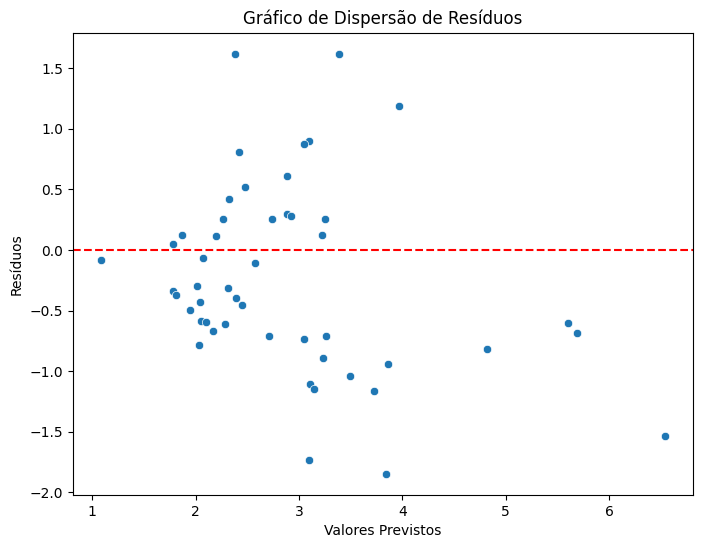

In [7]:
# Calcule os resíduos
residuals = y_test - y_pred

# Plote o gráfico de dispersão de resíduos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico de Dispersão de Resíduos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()


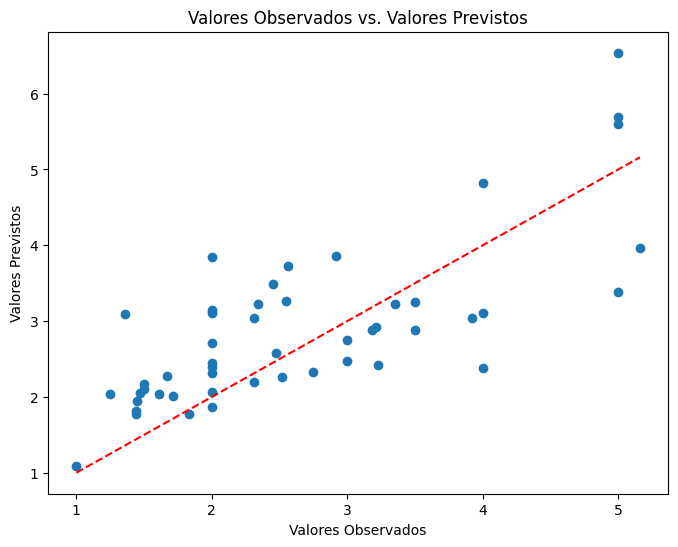

In [8]:
import matplotlib.pyplot as plt

# Plote o gráfico de valores observados versus valores previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Valores Observados vs. Valores Previstos')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Previstos')
plt.show()
